In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('images_info.csv')
df.head()

,file_name,date,from
0,1333.jpg,2023-04-22 09:29:37+00:00,Андрей
1,1332.jpg,2023-04-22 09:29:37+00:00,Андрей
2,1331.jpg,2023-04-22 09:29:37+00:00,Андрей
3,1330.jpg,2023-04-22 09:29:36+00:00,Андрей
4,1329.jpg,2023-04-22 09:29:36+00:00,Андрей


In [15]:
df['link'] = df['file_name'].apply(lambda x: 'https://t.me/physics171/'+x.split('.')[0])

In [16]:
df['date'] = df['date'].apply(lambda x: x.split(' ')[0])
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')
df = df.sort_values(by=['date'])
df=df[(df['date'].dt.dayofweek == 4) |  (df['date'].dt.dayofweek == 2)]
df= df[df['date'] >= '2022-09-01']

In [17]:
df['month'] = df['date'].dt.month

In [21]:
m = input('Enter month: ')
df_m = df[df['month'] == int(m)].groupby('date')['date'].count()
print('Choose date: ')
for i in range(len(df_m)):
    print(i+1, df_m['date'].iloc[i])
    

Choose date: 


KeyError: 'date'

In [19]:
for name, group in df.groupby('month'):
    print(name)
    # print name of month
    # print(group.groupby('date'))
    # how many dates in each month
    print(group.groupby('date')['date'].count().count())
    print(group.groupby('date')['date'].count())
    print()

1
4
date
2023-01-18     6
2023-01-20     5
2023-01-25     6
2023-01-27    12
Name: date, dtype: int64

2
7
date
2023-02-01    13
2023-02-03     6
2023-02-08     5
2023-02-10    11
2023-02-15     5
2023-02-22     1
2023-02-24    14
Name: date, dtype: int64

3
7
date
2023-03-01     7
2023-03-08    10
2023-03-10     8
2023-03-15     6
2023-03-17     8
2023-03-22     5
2023-03-24     6
Name: date, dtype: int64

4
4
date
2023-04-05    7
2023-04-12    9
2023-04-14    8
2023-04-19    5
Name: date, dtype: int64

9
7
date
2022-09-07     8
2022-09-09     7
2022-09-16    12
2022-09-21     3
2022-09-23     5
2022-09-28     3
2022-09-30     4
Name: date, dtype: int64

10
4
date
2022-10-07     5
2022-10-12     5
2022-10-19    10
2022-10-21    11
Name: date, dtype: int64

11
7
date
2022-11-02     7
2022-11-09     8
2022-11-11     6
2022-11-16     5
2022-11-18     6
2022-11-23     9
2022-11-25    10
Name: date, dtype: int64

12
4
date
2022-12-02    5
2022-12-07    5
2022-12-09    5
2022-12-14    6
Nam

<Axes: xlabel='month'>

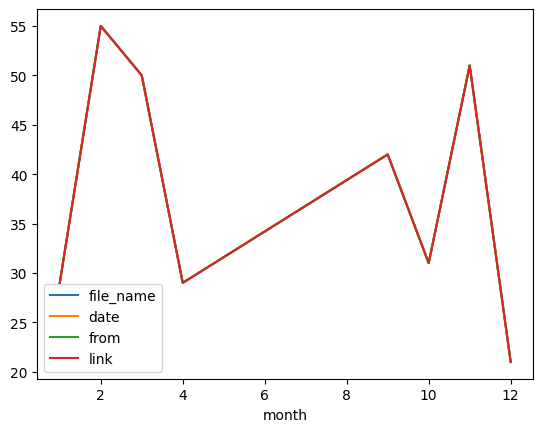

In [20]:
# make chart of grp 
df.groupby('month').count().plot()